In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('C:/Users/harip/Downloads/spam.csv', encoding='latin-1')  

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4848,ham,either way works for me. I am &lt;#&gt; year...,NaN,NaN,NaN
2200,ham,Haha... can... But i'm having dinner with my c...,NaN,NaN,NaN
3180,ham,So many people seems to be special at first si...,NaN,NaN,NaN
3356,ham,"Brainless Baby Doll..:-D;-), vehicle sariyag d...",NaN,NaN,NaN
4322,ham,Aight well keep me informed,NaN,NaN,NaN


In [7]:
df.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"],axis=1,inplace=True)

In [13]:
df.sample(5)

,v1,v2
4266,ham,SORRY IM STIL FUCKED AFTER LAST NITE WENT TOBE...
3493,spam,You are being contacted by our dating service ...
571,ham,Do you know where my lab goggles went
1669,ham,Very hurting n meaningful lines ever: \I compr...
2471,ham,"sry can't talk on phone, with parents"


In [15]:
from sklearn.preprocessing import LabelEncoder


In [17]:
lablen=LabelEncoder()

In [19]:
df.rename(columns={"v1":"target","v2":"text"},inplace=True)

In [21]:
df.sample(5)

,target,text
1250,ham,Ummmmmaah Many many happy returns of d day my ...
4122,ham,"Cool, want me to go to kappa or should I meet ..."
2452,ham,Okay. I've seen it. So i should pick it on fri...
5508,ham,"Machan you go to gym tomorrow, i wil come lat..."
4219,ham,U free on sat rite? U wan 2 watch infernal aff...


In [23]:
df["target"]=lablen.fit_transform(df["target"])

In [25]:
df.sample(4)

,target,text
2154,0,Oh god i am happy to see your message after 3 ...
3381,0,"Well, I meant as opposed to my drunken night o..."
471,0,"How long has it been since you screamed, princ..."
4539,0,"Urgh, coach hot, smells of chip fat! Thanks ag..."


In [27]:
df["target"].value_counts()

target
0    4825
1     747
Name: count, dtype: int64

In [29]:
from matplotlib import pyplot as plt

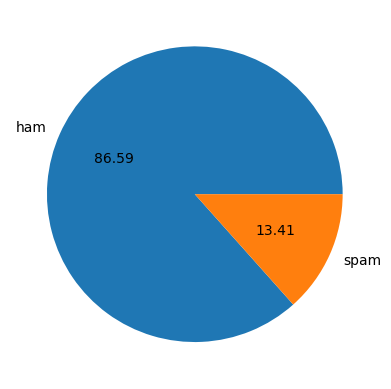

In [30]:
plt.pie(df["target"].value_counts(),labels=["ham","spam"],autopct="%0.2f")
plt.show()

In [33]:
df.duplicated().sum()

403

In [35]:
df=df.drop_duplicates()

In [37]:
df.duplicated().sum()

0

In [39]:
df["target"].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

In [41]:
df.shape

(5169, 2)

In [43]:
!pip install nltk


In [44]:
import nltk
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\harip\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [45]:
df["text"].apply(len)

0       111
1        29
2       155
3        49
4        61
       ... 
5567    161
5568     37
5569     57
5570    125
5571     26
Name: text, Length: 5169, dtype: int64

In [46]:
df["num_characters"]=df["text"].apply(len)

In [47]:
df

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161
5568,0,Will Ì_ b going to esplanade fr home?,37
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125


In [53]:
df["num_words"]=df["text"].apply(lambda x:len(nltk.word_tokenize(x)))

In [54]:
df

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15
...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35
5568,0,Will Ì_ b going to esplanade fr home?,37,9
5569,0,"Pity, * was in mood for that. So...any other s...",57,15
5570,0,The guy did some bitching but I acted like i'd...,125,27


In [57]:
df["num_sent"]=df["text"].apply(lambda x:len(nltk.sent_tokenize(x)))

In [59]:
df

,target,text,num_characters,num_words,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [61]:
df[["num_characters","num_words","num_sent"]].describe()

,num_characters,num_words,num_sent
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [63]:
df[df["target"]==0][["num_characters","num_words","num_sent"]].describe()

,num_characters,num_words,num_sent
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


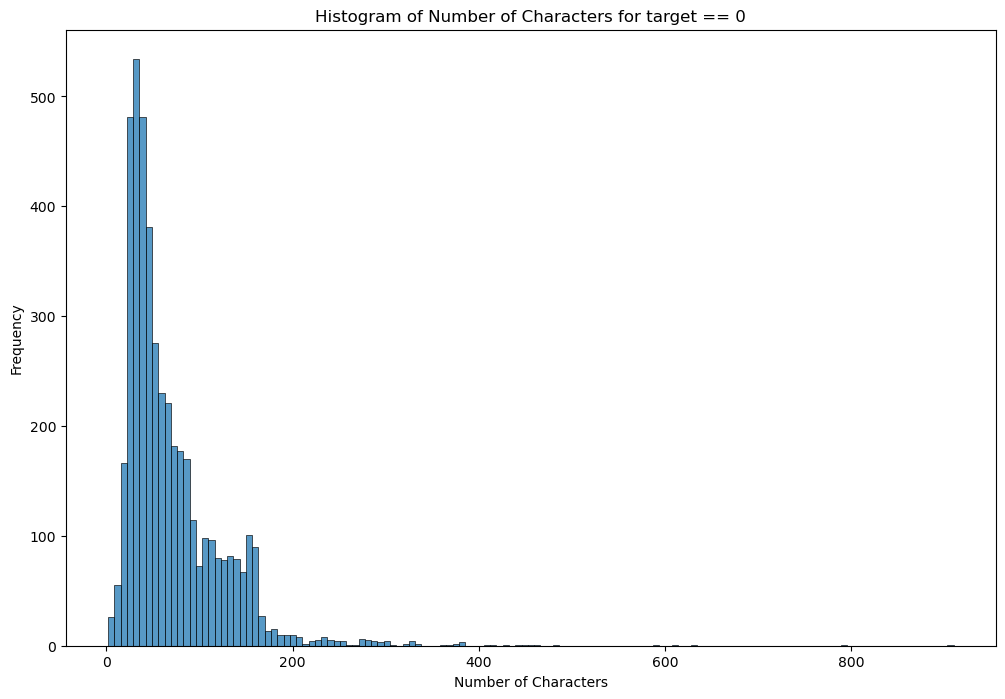

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
sns.histplot(df[df["target"] == 0]["num_characters"])
plt.xlabel("Number of Characters")
plt.ylabel("Frequency")
plt.title("Histogram of Number of Characters for target == 0")
plt.show()


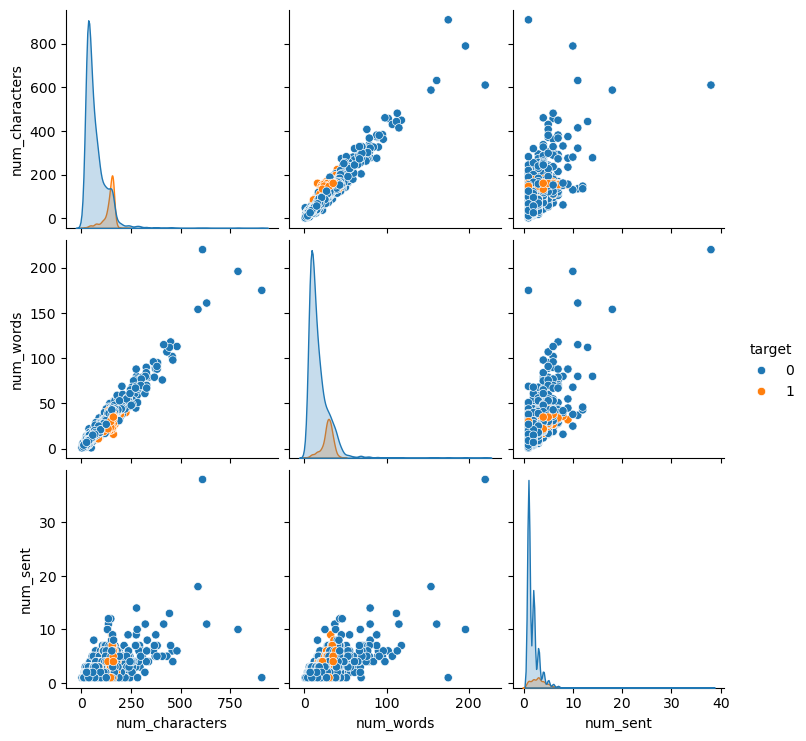

In [66]:
sns.pairplot(df,hue="target")

In [68]:
df.corr()

ValueError: could not convert string to float: 'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [77]:
import string
from string import punctuation
from nltk.corpus import stopwords
import nltk
from nltk import word_tokenize
from nltk.stem.porter import PorterStemmer

In [79]:
def transform(text):
    text=text.lower()
    words=nltk.word_tokenize(text)
    y=[]
    for i in words:
        if i.isalnum():
            y.append(i)
    text=y[:]
    y=[]
    for i in text:
        if i not in stopwords.words('english') and i not in punctuation:
            y.append(i)
    text=y[:]
    y=[]
    for i in text:
        ps=PorterStemmer()
        y.append(ps.stem(i))
        
    return " ".join(y)
print(transform("@Rama is dancing with @Sita in the garden which contains green melodies"))
    

rama danc sita garden contain green melodi


In [81]:
df["transformed_text"]=df["text"].apply(transform)

In [87]:
df

,target,text,num_characters,num_words,num_sent,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


In [89]:
!pip install wordcloud
from wordcloud import WordCloud

  Using cached wordcloud-1.9.3-cp312-cp312-win_amd64.whl.metadata (3.5 kB)
Using cached wordcloud-1.9.3-cp312-cp312-win_amd64.whl (301 kB)


In [91]:
wc=WordCloud(width=500,height=500,min_font_size=10,background_color="white")

In [93]:
spam=wc.generate(df[df["target"]==1]["transformed_text"].str.cat(sep=" "))

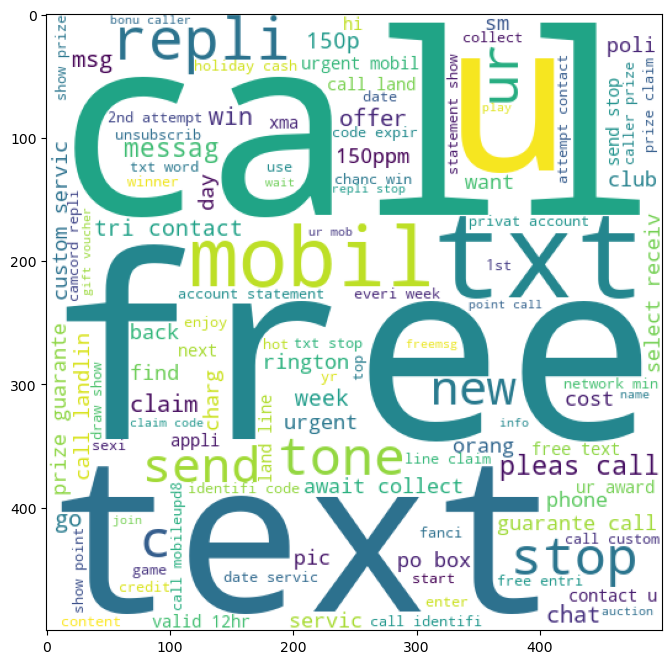

In [94]:
plt.figure(figsize=(15,8))
plt.imshow(spam)

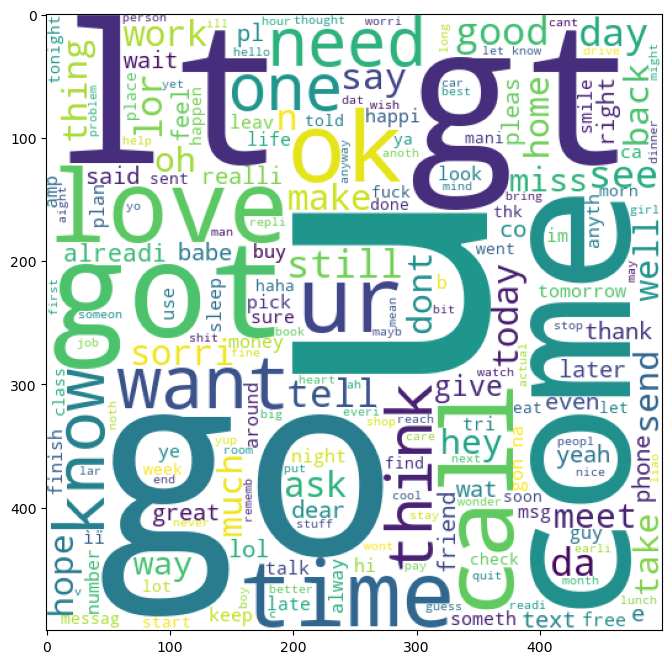

In [97]:
ham=wc.generate(df[df["target"]==0]["transformed_text"].str.cat(sep=" "))
plt.figure(figsize=(15,8))
plt.imshow(ham)

In [99]:
from collections import Counter

In [101]:
spam_li=[]
for words in df[df["target"]==1]["transformed_text"].tolist():
    for word in words.split():
        spam_li.append(word)
    


In [103]:
spam_count=pd.DataFrame(spam_li)
len(spam_count)

9939

In [105]:
ham_li=[]
for words in df[df["target"]==0]["transformed_text"].tolist():
    for word in words.split():
        ham_li.append(word)
    


In [107]:
pd.DataFrame(ham_li)

,0
0,go
1,jurong
2,point
3,crazi
4,avail
...,...
35399,us
35400,free
35401,rofl
35402,true


In [109]:
len(ham_count)

NameError: name 'ham_count' is not defined

([0, 1], [Text(0, 0, '0'), Text(1, 0, '1')])

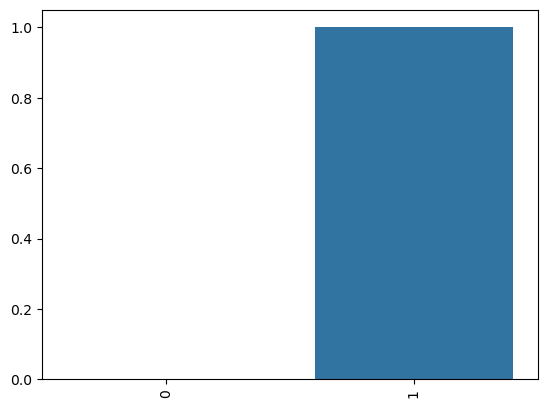

In [115]:
sns.barplot(Counter(spam_count).most_common(30)[0])
plt.xticks(rotation="vertical")

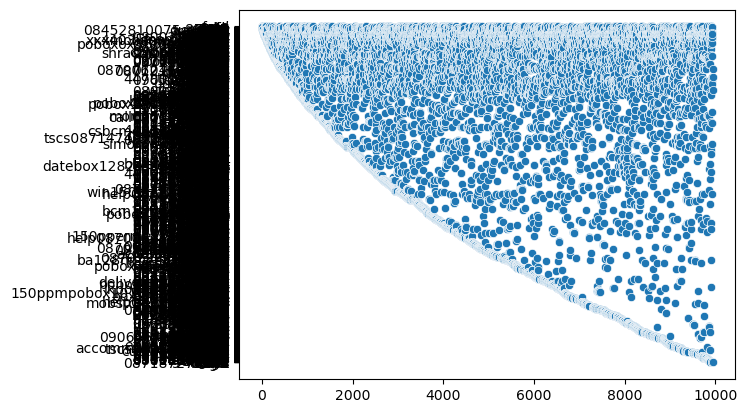

In [117]:
sns.scatterplot(spam_li)
plt.show()

In [118]:
df.corr()


ValueError: could not convert string to float: 'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [121]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler

In [123]:
cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)

In [125]:
#x=cv.fit_transform(df["transformed_text"]).toarray()
x=tfidf.fit_transform(df["transformed_text"]).toarray()

In [127]:
#m=MinMaxScaler()
#m.fit_transform(x)

In [129]:
y=df["target"]

In [131]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score

In [133]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [135]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB

In [137]:
gnb=GaussianNB()
mnb=MultinomialNB()

In [139]:
gnb.fit(x_train,y_train)
mnb.fit(x_train,y_train)

MultinomialNB()

In [141]:
y_pred=gnb.predict(x_test)

In [143]:
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred))

0.8607350096711799
0.5020746887966805


In [145]:
y_pred2=mnb.predict(x_test)

In [147]:
print(accuracy_score(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9729206963249516
0.9915966386554622


In [149]:
import pickle

In [151]:
pickle.dump(tfidf,open("vectorizer.pkl","wb"))
pickle.dump(mnb,open("model.pkl","wb"))